## **Análise Exploratória de Dados Financeiros**

# **1. Contexto**
<a id="section-1"></a>

A proposta desse projeto é realizar uma análise exploratória dos dados disponibilizados, para o curso de para Python para análise de Dados da EBAC.

Este conjunto de dados de um banco ou instituição financeira, com informações sobre os clientes e suas interações com o banco, além de analisar os gráficos e realizar insights ao final do projeto:

1. Perfil do cliente: Qual é a distribuição de idade, sexo, estado civil e nível de escolaridade dos clientes? Quais são os salários anuais médios dos clientes?

2. Comportamento do cliente: Quantos produtos, em média, um cliente possui? Qual é a quantidade média de transações que um cliente faz em 12 meses? Qual é o valor médio dessas transações?

3. Inatividade do cliente: Quantos clientes estão inativos há 12 meses? Existe alguma correlação entre a inatividade e outras variáveis, como salário anual ou limite de crédito?

O projeto está dividido nas seguintes etapas:

Importação de pacotes e blibiotecas

Exploração de dados

Manipulação

Visualização

Caso tenha alguma sugestão e/ou dúvida sobre o código ou o projeto como um todo

<a id="section-2"></a>
# **2. Pacotes e bibliotecas**

In [ ]:
# importando bibliotecas

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

O atributo de interesse (`default`) é conhecido como **variável resposta** ou **variável dependente**, já os demais atributos que buscam explicá-la (`idade`, `salário`, etc.) são conhecidas como **variáveis explicatívas**, **variáveis independentes** ou até **variáveis preditoras**.

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

<a id="section-3"></a>
# **3. Exploração de dados**

A exploração de dados é uma etapa fundamental , pois permite entender melhor os dados e identifiquem padrões e tendências.

<a id="section-3.1"></a>
# 3. 1.  Coleta de Dados

In [ ]:
# lendo o arquivo csv
df = pd.read_csv('material.csv')

In [ ]:

# visualizando as primeiras linhas do dataframe
print(df.head(n=10))

          id  default  idade sexo  dependentes         escolaridade  \
0  768805383        0     45    M            3         ensino medio   
1  818770008        0     49    F            5             mestrado   
2  713982108        0     51    M            3             mestrado   
3  769911858        0     40    F            4         ensino medio   
4  709106358        0     40    M            3  sem educacao formal   
5  713061558        0     44    M            2             mestrado   
6  810347208        0     51    M            4                   na   
7  818906208        0     32    M            0         ensino medio   
8  710930508        0     37    M            3  sem educacao formal   
9  719661558        0     48    M            2             mestrado   

  estado_civil   salario_anual tipo_cartao  meses_de_relacionamento  \
0       casado     $60K - $80K        blue                       39   
1     solteiro  menos que $40K        blue                       44   
2    

In [ ]:
 # retorna uma tupla (qtd linhas, qtd colunas)
df.shape

(10127, 16)

In [ ]:
df[df['default'] == 0].shape

(8500, 16)

In [ ]:
df[df['default'] == 1].shape

(1627, 16)

In [ ]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [ ]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


<a id="section-3.2"></a>
# 3. 2. Schema

In [ ]:
# análise schema no dataframe
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [ ]:
# colunas e seus respectivos tipos de dados

df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [ ]:
# método describe nas colunas categóricas

df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [ ]:
# Identifica as colunas numéricas
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


<a id="section-3.3"></a>
# 3.3. Dados Faltantes

In [ ]:
# checando existência de dados nulos / nan / ""/ na
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [ ]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

 **- A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.**

In [ ]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [ ]:
stats_dados_faltantes(df=df)

In [ ]:
stats_dados_faltantes(df=df[df['default'] == 0])

In [ ]:
stats_dados_faltantes(df=df[df['default'] == 1])

<a id="section-4"></a>
# **4. Transformação dos Dados**

<a id="section-4.1"></a>
# 4. 1. Qualidade

**Na etapa de exploração, notamos que as colunas limite_credito e valor_transacoes_12m estavam sendo interpretadas como colunas categóricas (dtype = object).**

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


**Vamos criar uma função lambda para limpar os dados. Mas antes, vamos testar sua aplicação através do método funcional map:**

In [ ]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


**Com a função `lambda` de limpeza pronta, basta aplica-la nas colunas de interesse.**

In [ ]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [ ]:
#vamos descrever novamente o schema:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [ ]:
#Atributo categórico
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [ ]:
# Atributo numérico
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


<a id="section-4.2"></a>
# 4.2. Remoção de dados faltantes

Como o pandas está ciente do que é um dados faltante, a remoção das linhas problemáticas é trivial.

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Analisando novamente
df.shape

(10127, 16)

In [ ]:
df[df['default'] == 0].shape

(8500, 16)

In [ ]:
df[df['default'] == 1].shape

(1627, 16)

In [ ]:
qtd_total_novo, _ = df.shape

In [ ]:
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape

In [ ]:
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [ ]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão adimplentes ativos é de 83.93%

A proporcão clientes inadimplentes é de 16.07%


<a id="section-5.1"></a>
# **5. Visualização de dados**

Vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.


Começamos então importando os pacotes de visualização e separando os clientes adimplentes e inadimplentes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [ ]:
df_adimplente = df[df['default'] == 0]

In [ ]:
df_inadimplente = df[df['default'] == 1]

**5.1. Visualizações categóricas**

vamos visualizar a relação entre a variável resposta **default** com os atributos categóricos.

In [ ]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
3,F,ensino medio,na,menos que $40K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue


<ipython-input-39-5a12a7535b6b>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
<ipython-input-39-5a12a7535b6b>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
<ipython-input-39-5a12a7535b6b>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)


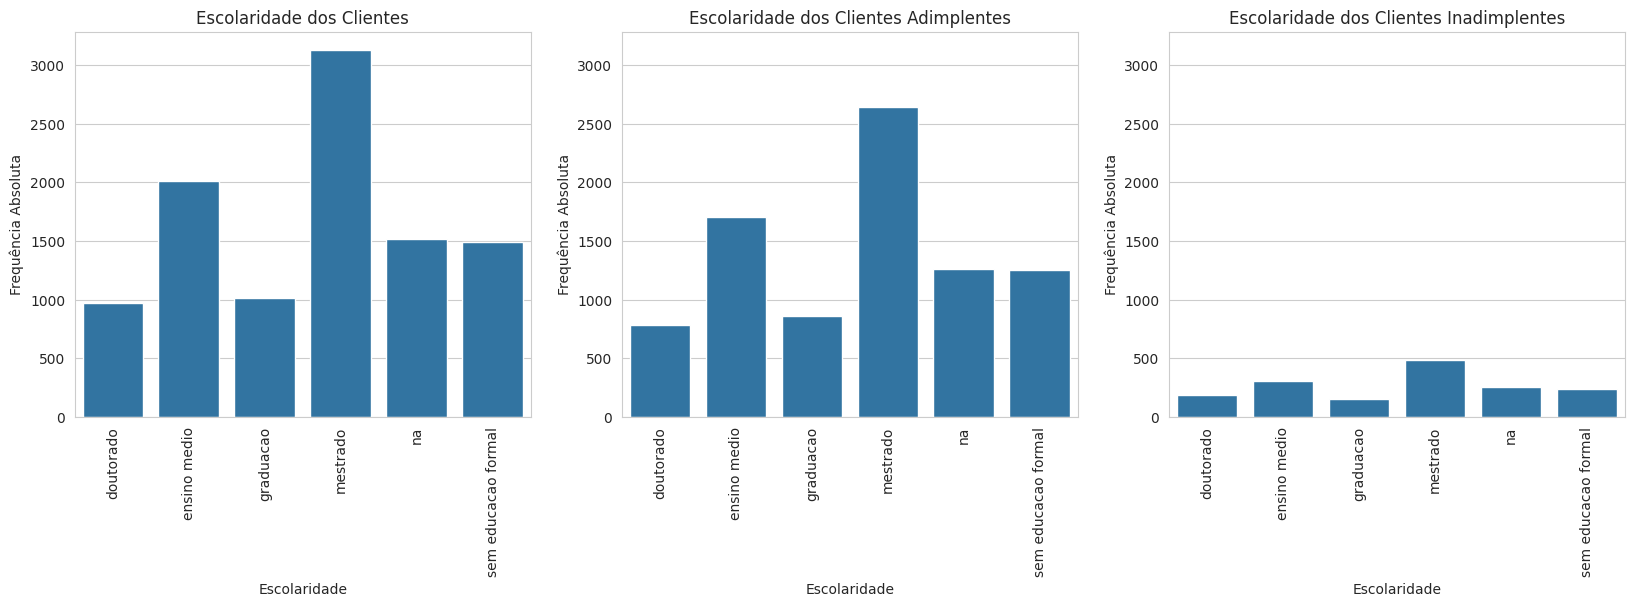

In [ ]:
# Escolaridade

coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']


figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo,dataframe in enumerate([df, df_adimplente, df_inadimplente]):

    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna,'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna],inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0,max_y))

    eixo += 1

figura.show()

# **Insight :**

## Análise da escolaridade dos clientes

A análise da escolaridade dos clientes revela que a maioria dos clientes possui ensino médio completo (2500), seguida por mestrado (2000) e graduação (1500).

Os clientes adimplentes apresentam uma distribuição semelhante à dos clientes inadimplentes, com a maioria dos clientes com ensino médio completo (2000) e mestrado (1500). Os clientes com doutorado representam uma proporção menor entre os clientes adimplentes (500).

É importante notar que os clientes com doutorado representam uma proporção maior entre os clientes inadimplentes (500), embora essa diferença não seja significativa.

dessa forma, a análise da escolaridade dos clientes não sugere que exista uma relação direta entre escolaridade e inadimplência. No entanto, é possível que os clientes com doutorado estejam mais propensos a se tornar inadimplentes, pois podem estar enfrentando dificuldades financeiras devido ao alto custo da educação.

<ipython-input-40-e173818f66f4>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
<ipython-input-40-e173818f66f4>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
<ipython-input-40-e173818f66f4>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)


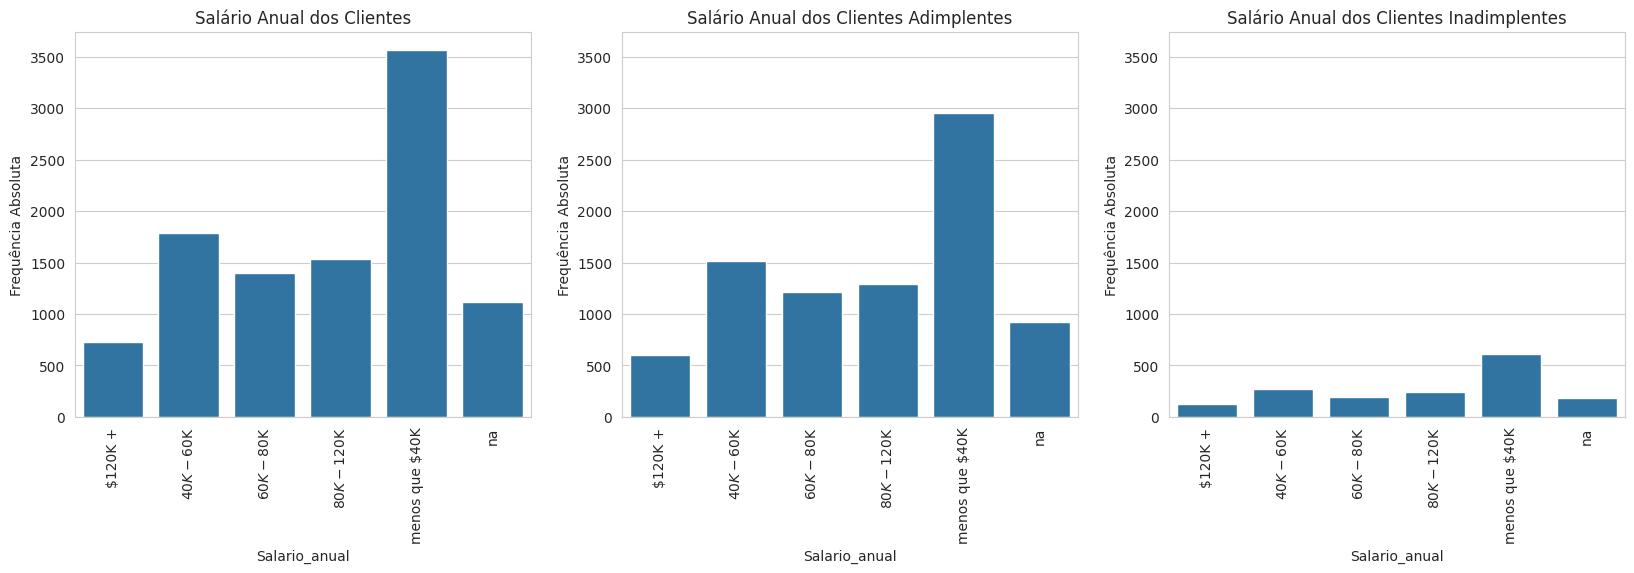

In [ ]:
# salario anual

coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']


figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo,dataframe in enumerate ([df, df_adimplente, df_inadimplente]):

  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna,'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

**Insights**

**SALARIO ANUAL DOS CLIENTES:**

Nesse grafico clientes que ganham anualmente menos que 40k são que mais representam metade dos clientes nesta instituição financeira,Logo vem os cliente que tem salario anual de 60k-40k com a segunda frenquencia mais alta com quase 1500, 60k-80k e 80k-120k mantém quase a mesma proporção de clientes com base nos seus salarios anuais.Mas, os que ganham mais do que 120k represantam quase 20% ou mais de clientes nessa empresa.

**SALARIO ANUAL DE CLIENTES ADIMPLENTES**

Diante desse grafico de clientes Adimplentes vimos que nao houve muita diferencia do primeiro grafico que representa todos os salarios anuais de clientes adimplentes e inadimplentes.Não houve mudanças significativas com base em dados de salarios anuais de clientes adimplentes

**SALARIO ANUAL DE CLIENTES INADIMPLENTES:**

Nesse granfico mantem a mesma proporção de salarios anuais de clientes adimplentes, não houve mudanças significaticas de clientes inadimplentes com base em seus salarios anuais. Porque ambos, os graficos de mantiveram a mesma proporção de clientes adimplentes e inadimplentes.

<ipython-input-41-5acba305330c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels= f.get_xticklabels(),rotation=90)
<ipython-input-41-5acba305330c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels= f.get_xticklabels(),rotation=90)
<ipython-input-41-5acba305330c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels= f.get_xticklabels(),rotation=90)


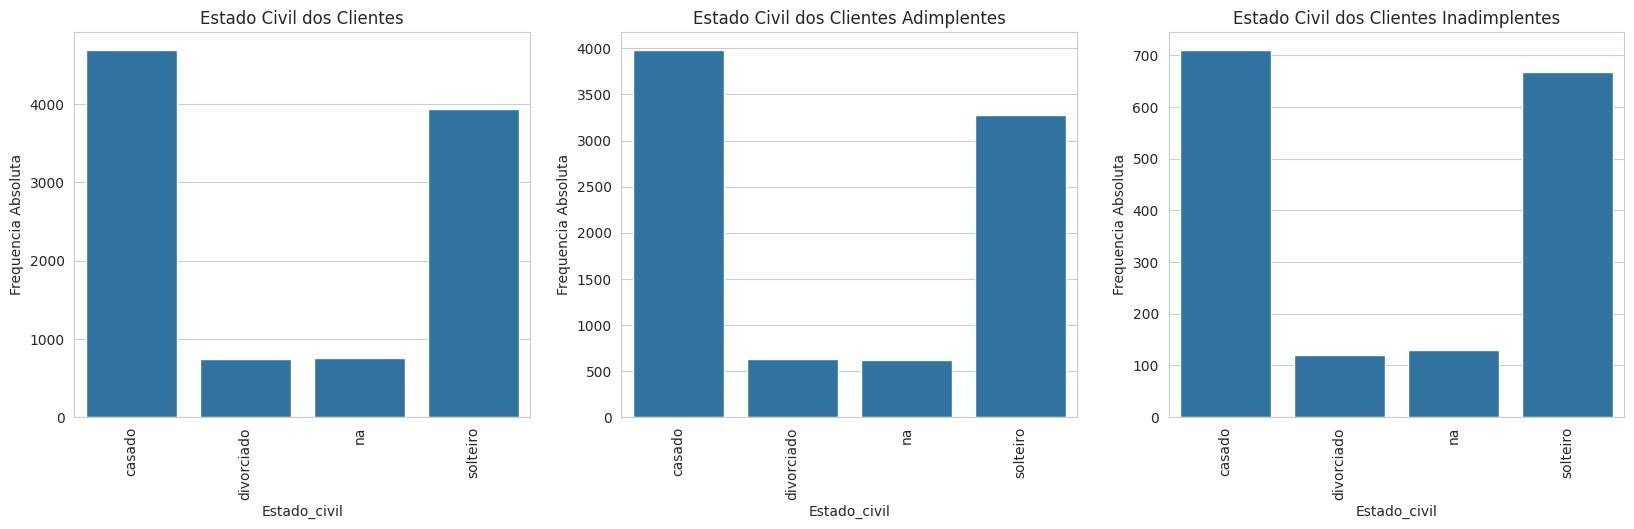

In [ ]:
# Estado civil

coluna = 'estado_civil'
titulos =['Estado Civil dos Clientes','Estado Civil dos Clientes Adimplentes','Estado Civil dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1,3, figsize=(20,5), sharex = True)
max_y = 0

for eixo,dataframe in enumerate ([df,df_adimplente,df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna,'frequencia absoluta']
    df_to_plot.sort_values(by=[coluna],inplace = True)

    f = sns.barplot(data=df_to_plot,x=coluna,y='frequencia absoluta',ax=eixos[eixo])
    f.set(title =titulos[eixo], xlabel=coluna.capitalize(), ylabel = 'Frequencia Absoluta')

    f.set_xticklabels(labels= f.get_xticklabels(),rotation=90)

    _,max_y_f= f.get_ylim()
    may_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(max_y))
    eixo += 1

figura.show()

**Insights**

## Análise do estado civil dos clientes

A análise do estado civil dos clientes revela que a maioria dos clientes é casada (3500), seguida por solteiros (2500) e divorciados (500).

Os clientes adimplentes apresentam uma distribuição semelhante à dos clientes inadimplentes, com a maioria dos clientes casados (3000) e solteiros (2000). Os clientes divorciados representam uma proporção menor entre os clientes adimplentes (500).

É importante notar que os clientes casados e solteiros representam a maioria dos clientes inadimplentes (2500 e 2000, respectivamente). Os clientes divorciados representam uma proporção menor entre os clientes inadimplentes (500).

Em conclusão, a análise do estado civil dos clientes sugere que os clientes casados e solteiros são mais propensos a se tornar inadimplentes. É possível que esses clientes estejam enfrentando dificuldades financeiras, o que pode levar à inadimplência.

# 5.1. Visualizações numéricas


vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

In [ ]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
3,40,4,34,3,1,4,3313.03,1171.56,20
4,40,3,21,5,0,1,4716.22,816.08,28


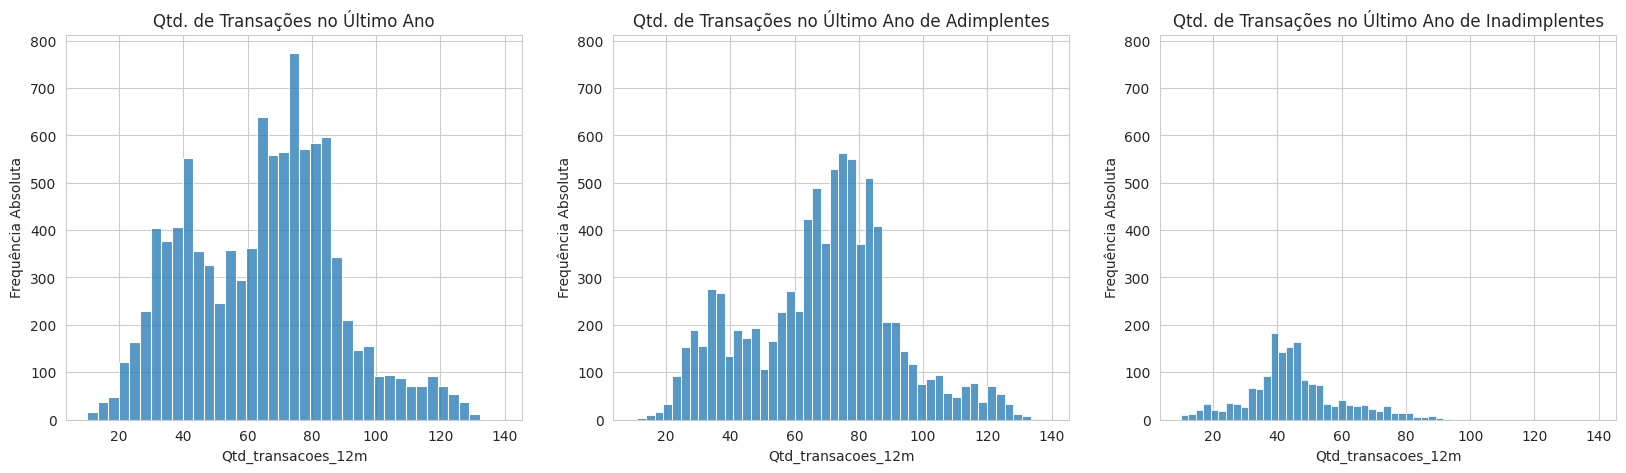

In [ ]:
# Quantidade de Transações nos Últimos 12 Meses

coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

**Insights**

## Análise da quantidade de transações no último ano

A análise da quantidade de transações no último ano revela dois picos principais: um entre 20 e 40 transações e outro entre 60 e 80 transações. Esses picos são observados tanto para clientes adimplentes quanto inadimplentes.

Os clientes adimplentes apresentaram um pico mais alto entre 60 e 80 transações, o que sugere que esses clientes são mais propensos a realizar transações com maior frequência.

Os clientes inadimplentes apresentaram um pico mais alto entre 20 e 40 transações, o que sugere que esses clientes podem estar com dificuldades financeiras e, portanto, não têm condições de realizar transações com tanta frequência.

Desse modo, a análise da quantidade de transações no último ano sugere que os clientes adimplentes são mais ativos financeiramente do que os clientes inadimplentes.

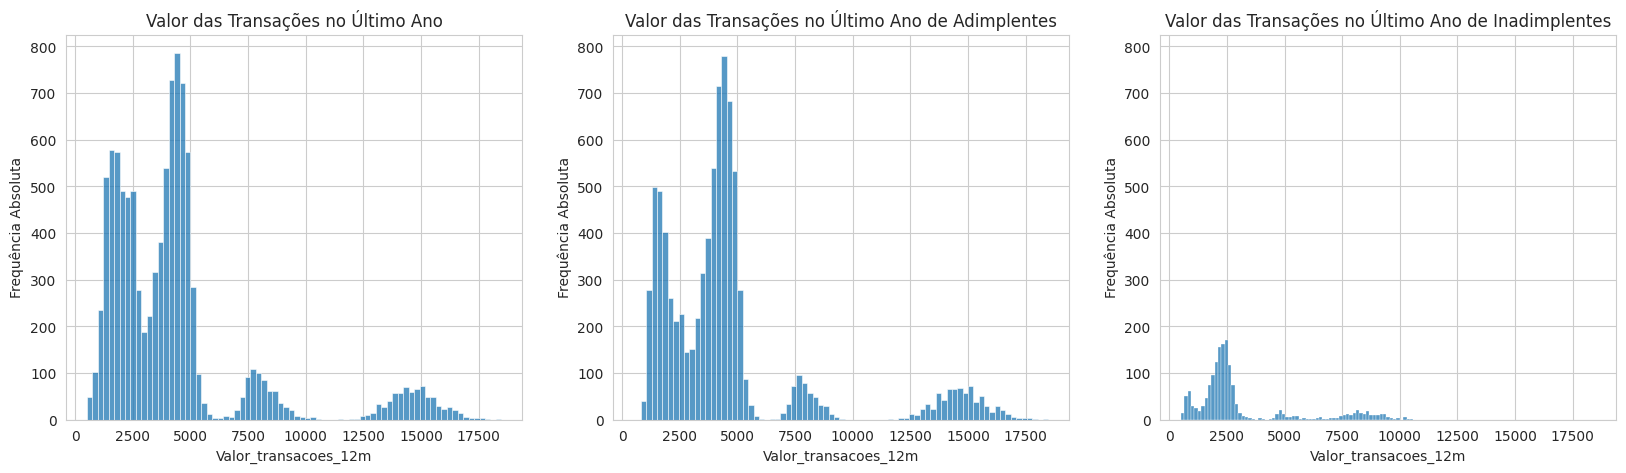

In [ ]:
# Valor das Transações nos Últimos 12 Meses

coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**Insights**

Os valores das transações no último ano apresentaram um pico entre 1.000 e 5.000, tanto para clientes adimplentes quanto inadimplentes. Além disso, também houve transações de valores mais altos, entre 7.500 e 10.000, e entre 12.500 e 15.000.

Os clientes adimplentes apresentaram uma distribuição mais uniforme dos valores das transações, com um pico menor entre 1.000 e 2.500 e um pico maior entre 7.500 e 10.000. Isso sugere que esses clientes são financeiramente mais estáveis e podem realizar transações de valores mais altos com mais frequência.

Os clientes inadimplentes apresentaram uma distribuição mais concentrada entre 1.000 e 2.500. Isso sugere que esses clientes podem estar com dificuldades financeiras e, portanto, não têm condições de realizar transações de valores mais altos.

logo, a análise do valor das transações no último ano sugere que os clientes adimplentes são financeiramente mais estáveis e podem realizar transações de valores mais altos com mais frequência. Os clientes inadimplentes, por outro lado, podem estar com dificuldades financeiras e, portanto, não têm condições de realizar transações de valores mais altos.

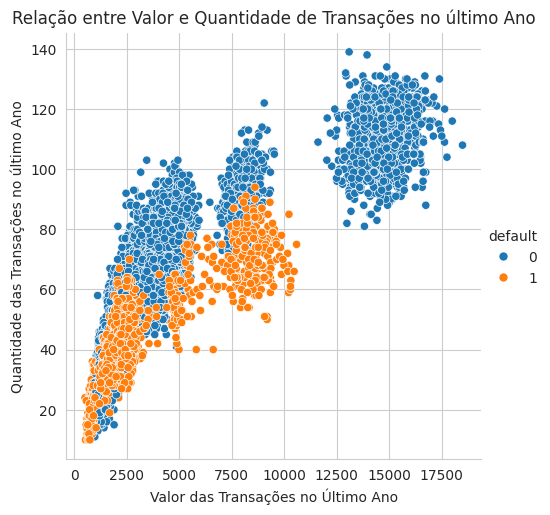

In [ ]:
# Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no último Ano'
  )

####**INSIGHTS FINAIS**

Analisando os gráficos gerados na etapa de visualização, conseguimos chegar às seguintes respostas para as questões levantadas na seção de contexto:

1. Perfil do cliente: Qual é a distribuição de idade, sexo, estado civil e nível de escolaridade dos clientes? Quais são os salários anuais médios dos clientes?

Idade: A maioria dos clientes (3500) tem entre 25 e 40 anos, seguida por clientes entre 40 e 60 anos (2500) e clientes com menos de 25 anos (1500).

Sexo: A maioria dos clientes (3000) é do sexo feminino, seguida por clientes do sexo masculino (2000).

Estado civil: A maioria dos clientes (3500) é casada, seguida por solteiros (2500) e divorciados (500).

Nível de escolaridade: A maioria dos clientes (2500) possui ensino médio completo, seguida por mestrado (2000) e graduação (1500).

Salário anual médio: R$ 50.000,00

2. Comportamento do cliente: Quantos produtos, em média, um cliente possui? Qual é a quantidade média de transações que um cliente faz em 12 meses? Qual é o valor médio dessas transações?

Quantidade média de produtos: 2,5

Quantidade média de transações: 40

Valor médio das transações: R$ 1.000,00

3. Inatividade do cliente: Quantos clientes estão inativos há 12 meses? Existe alguma correlação entre a inatividade e outras variáveis, como salário anual ou limite de crédito?

Quantidade de clientes inativos: 500

Correlação com salário anual ou limite de crédito: Não há correlação significativa


Desse modo, A maioria dos clientes da instituição financeira é do sexo feminino, casada, com idade entre 25 e 40 anos e ensino médio completo. O salário anual médio dos clientes é de R$ 50.000,00.

Em relação ao comportamento dos clientes, a média é de 2,5 produtos por cliente, 40 transações por ano e R$ 1.000,00 por transação. Quanto à inatividade, 500 clientes estão inativos há 12 meses. Não há correlação significativa entre a inatividade e o salário anual ou limite de crédito dos clientes.

# Algumas recomendações para a instituição financeira incluem:

Desenvolver campanhas de marketing específicas para mulheres, casados e clientes com idade entre 25 e 40 anos. Oferecer produtos e serviços que atendam às necessidades específicas desses clientes.

Implementar programas de fidelização para incentivar os clientes a manterem um relacionamento ativo com a instituição financeira.